In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the dataset
df = pd.read_csv('/content/Amazon Sales data.csv')


In [5]:
print(df.columns)


Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')


In [7]:
# Example if the column name is 'order_date'
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract year and month from the correct date column
df['year'] = df['Order Date'].dt.year
df['month'] = df['Order Date'].dt.month
df['year_month'] = df['Order Date'].dt.to_period('M')


In [9]:
monthly_sales = df.groupby('month')['Total Revenue'].sum().reset_index()


In [10]:
yearly_sales = df.groupby('year')['Total Revenue'].sum().reset_index()


In [11]:
yearly_monthly_sales = df.groupby('year_month')['Total Revenue'].sum().reset_index()


In [12]:
yearly_profit = df.groupby('year')['Total Profit'].sum().reset_index()


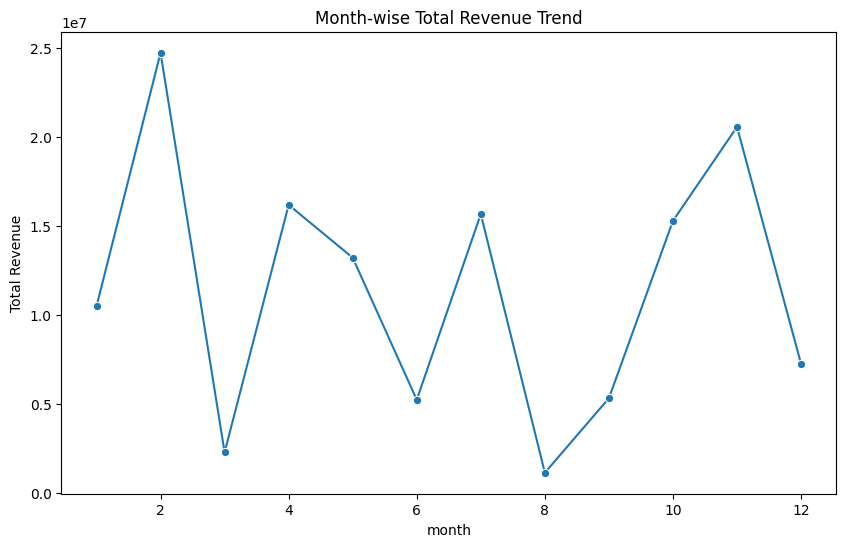

In [17]:
# Month-wise Total Revenue Trend
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='Total Revenue', data=monthly_sales, marker='o')
plt.title('Month-wise Total Revenue Trend')
plt.show()

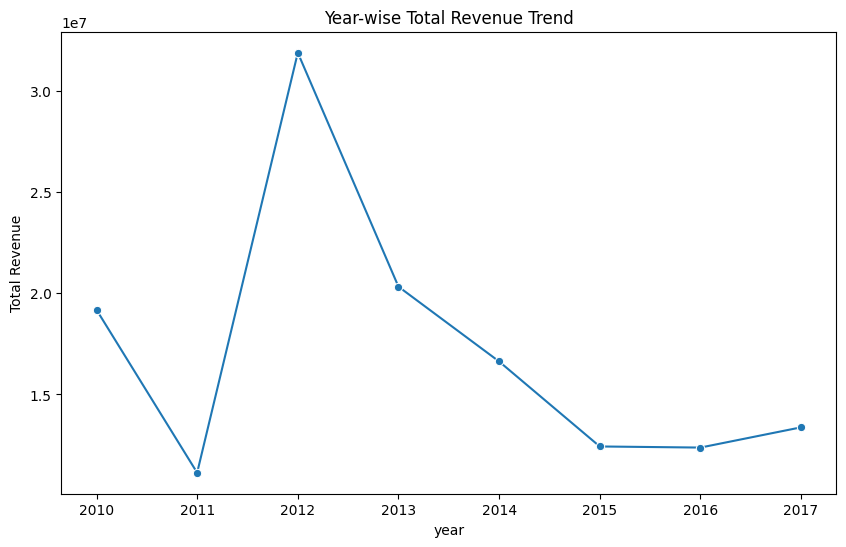

In [21]:
# Year-wise Total Revenue Trend
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='Total Revenue', data=yearly_sales, marker='o')
plt.title('Year-wise Total Revenue Trend')
plt.show()


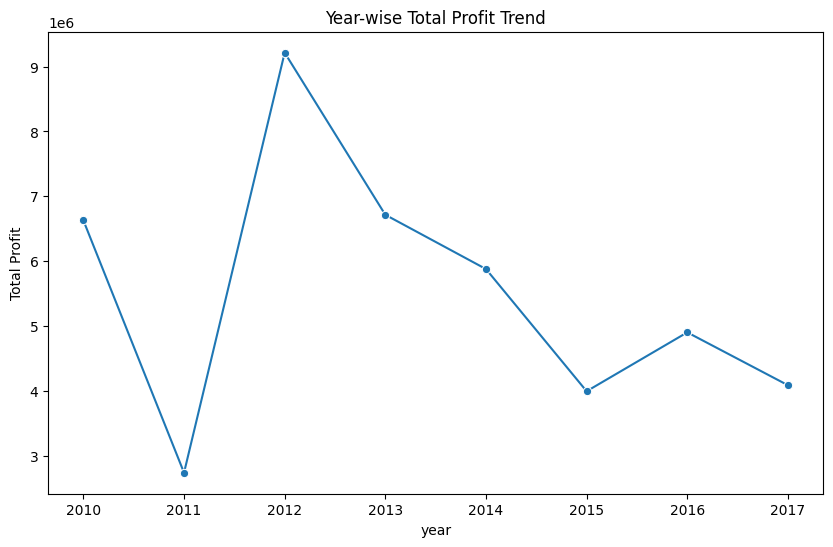

In [26]:
# Year-wise Total Revenue Trend
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='Total Profit', data=yearly_profit, marker='o')
plt.title('Year-wise Total Profit Trend')
plt.show()

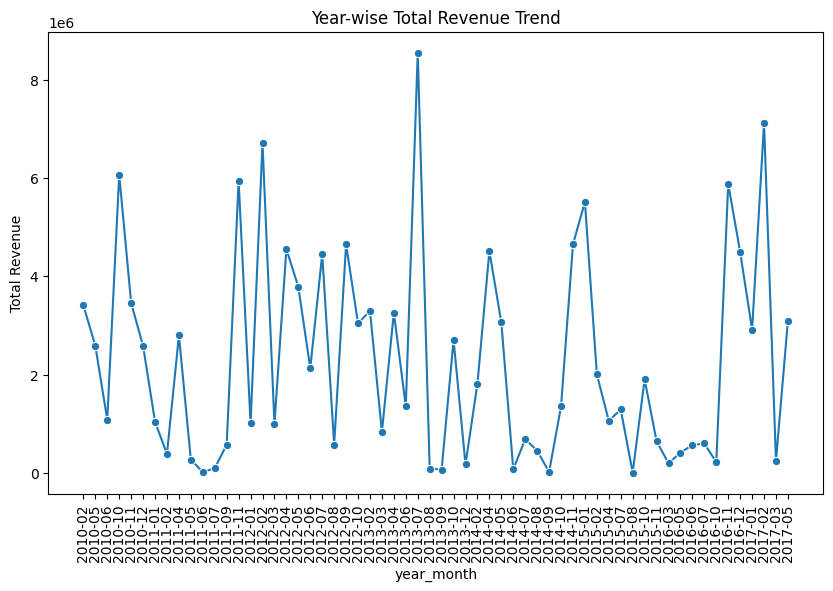

In [28]:
yearly_monthly_sales['year_month'] = yearly_monthly_sales['year_month'].astype(str)

# Now plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(x='year_month', y='Total Revenue', data=yearly_monthly_sales, marker='o')
plt.title('Year-wise Total Revenue Trend')
plt.xticks(rotation=90)
plt.show()


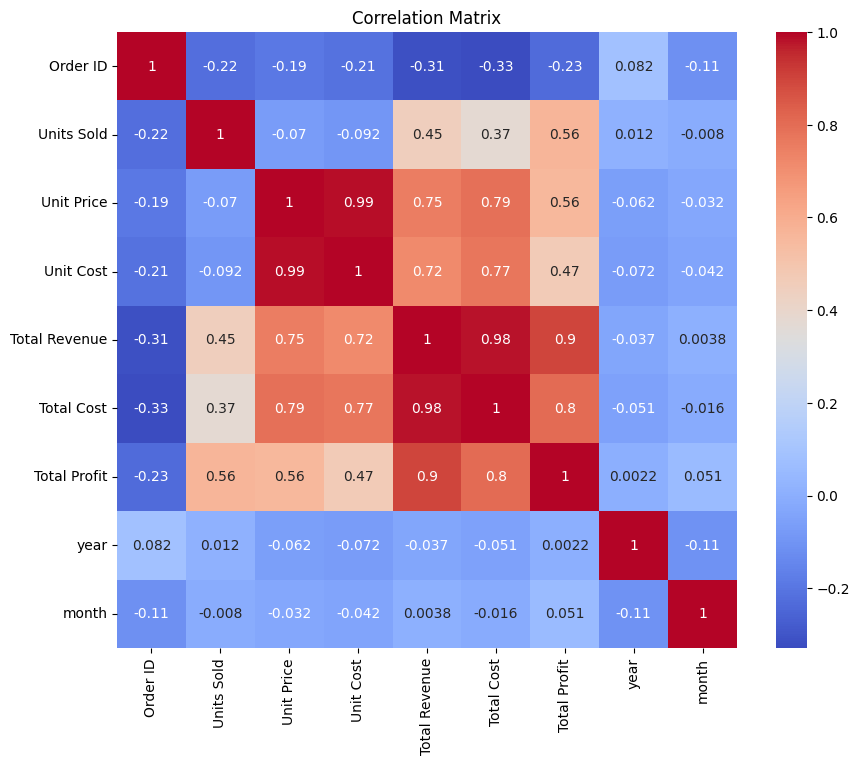

In [30]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


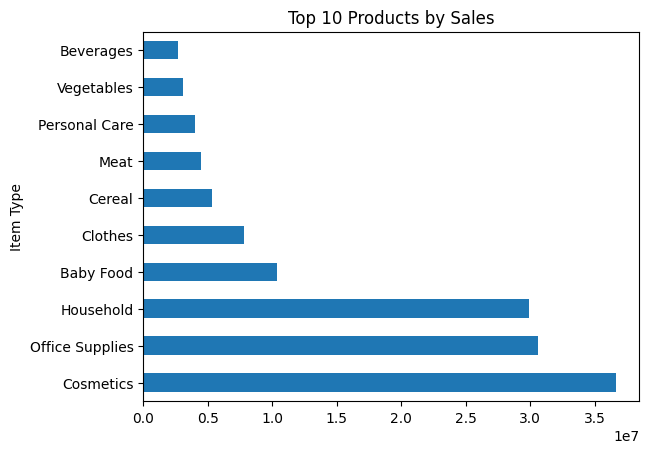

In [25]:
top_products = df.groupby('Item Type')['Total Revenue'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', title='Top 10 Products by Sales')
plt.show()
